In [242]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [25, 10]
import seaborn as sns




custom_style_gold = {
    'axes.labelcolor': 'blue',
    'axes.edgecolor': 'gray',
    'axes.facecolor': '#FFFFF0',
    'xtick.color': 'green',
    'ytick.color': 'red',
    'font.size': 15,
    'legend.fontsize': 12,
    'grid.color': '#E6DAA6',
}

custom_style_Lavender = {
    'axes.labelcolor': 'blue',
    'axes.edgecolor': 'gray',
    'axes.facecolor': '#E6E6FA',
    'xtick.color': 'green',
    'ytick.color': 'red',
    'font.size': 15,
    'legend.fontsize': 12,
    'grid.color': '#C79FEF',
}


In [243]:


file = '/Users/melikakeshavarz/Desktop/Thesis/Dekany_replication_2/training_metadata/o4rrab_gaiaDR2_bp_rp_i_g_param.dat'



data = []
header = []
with open(file, 'r') as file:
    for line in file:
        out_line=line
        if line.startswith('# '):
            out_line=line.replace('# ', '')
            header.append(out_line)
        else:
            line = line.split()
            data.append(line)
        

df = pd.DataFrame()

df = pd.DataFrame([[x for x in row] for row in data])
df[0] = df[0].astype(int)
header[0].split()
head_dict = {key: value for key, value in zip(header[0].split(), df.columns) }
df.columns = head_dict
df.drop_duplicates(inplace= True)
df.reset_index(drop = True)
df.columns

Index(['id', 'period', 'Nep_bp', 'totamp_bp', 'A1_bp', 'A2_bp', 'A3_bp',
       'phi1_bp', 'phi2_bp', 'phi3_bp', 'phi21_bp', 'phi31_bp', 'meanmag_bp',
       'cost_bp', 'phcov_bp', 'phcov2_bp', 'snr_bp', 'order_bp', 'minmax_bp',
       'Nep_rp', 'totamp_rp', 'A1_rp', 'A2_rp', 'A3_rp', 'phi1_rp', 'phi2_rp',
       'phi3_rp', 'phi21_rp', 'phi31_rp', 'meanmag_rp', 'cost_rp', 'phcov_rp',
       'phcov2_rp', 'snr_rp', 'order_rp', 'minmax_rp', 'OGLEID', 'Nep_i',
       'totamp_i', 'A1_i', 'A2_i', 'A3_i', 'A1_e_i', 'A2_e_i', 'A3_e_i',
       'phi1_i', 'phi2_i', 'phi3_i', 'phi1_e_i', 'phi2_e_i', 'phi3_e_i',
       'phi21_i', 'phi21_e_i', 'phi31_i', 'phi31_e_i', 'meanmag_i',
       'meanmag_e_i', 'cost_i', 'costN_i', 'phcov_i', 'phcov2_i', 'snr_i',
       'Npt_i', 'order_i', 'minmax_i', 'FeH', 'FeH_e', 'Nep_g', 'totamp_g',
       'A1_g', 'A2_g', 'A3_g', 'phi1_g', 'phi2_g', 'phi3_g', 'phi21_g',
       'phi31_g', 'meanmag_g', 'cost_g', 'phcov_g', 'phcov2_g', 'snr_g',
       'Npt_g', 'order_g', 'm

In [244]:
df_Liu = pd.read_csv('/Users/melikakeshavarz/Desktop/Thesis/data/rrls_liu_new.csv')
df_Liu

,source_id,epoch_g,pf,pf_error,phi31_g,phi31_g_error,phi21_g,phi21_g_error,A1,A1_error,A2,A2_error,A3,A3_error,FeH,FeH_err
0,2536241964258088320,1693.654345,0.588992,0.000019,1.782574,0.322368,3.892365,0.203928,0.288177,0.034617,0.143380,0.042677,0.113952,0.035319,-1.907,0.053
1,2638915012894951936,1666.405441,0.469398,0.000003,1.644409,0.221470,3.859126,0.226588,0.416417,0.027282,0.205015,0.031585,0.149239,0.045249,-1.310,0.094
2,2536827282401261568,1691.308674,0.527019,0.000005,1.921303,0.181992,3.910546,0.121897,0.418117,0.016120,0.190865,0.019775,0.158952,0.015800,-1.565,0.053
3,2643864395767909376,1670.101919,0.587523,0.000003,2.244831,0.166455,3.970047,0.085945,0.231689,0.008718,0.119825,0.015544,0.089175,0.008839,-1.714,0.079
4,2551464805823863680,1693.957342,0.563298,0.000003,1.681930,0.102798,3.979967,0.057340,0.356944,0.009461,0.161751,0.010715,0.115447,0.011161,-1.096,0.127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2184,312130292901682688,1696.207406,0.789253,0.000021,1.295126,0.354821,3.962671,0.248889,0.340315,0.044603,0.116288,0.039588,0.099228,0.038780,-0.501,0.077
2185,852322825233930112,1711.523231,0.699753,0.000006,2.257788,0.077221,4.223895,0.063502,0.294550,0.008202,0.139768,0.006606,0.087313,0.008547,-2.000,0.076
2186,1198863915076552960,1715.490228,0.490570,0.000002,2.019226,0.149498,4.115500,0.072728,0.385476,0.020287,0.186419,0.014386,0.102680,0.011760,-1.649,0.053
2187,1316840138346618880,1716.751317,0.929156,0.000007,2.780362,0.069032,4.655382,0.022407,0.319536,0.002671,0.141895,0.002770,0.052843,0.003336,-0.783,0.076


In [245]:
df_C = pd.read_csv('/Users/melikakeshavarz/Desktop/Thesis/data/rrls_crestani_new.csv')
df_C

,source_id,pf,pf_error,phi31_g,phi31_g_error,phi21_g,phi21_g_error,A1,A1_error,A2,A2_error,A3,A3_error,FeH,FeH_err
0,6380659528686603008,0.550068,0.000002,1.668996,0.060499,3.863215,0.026170,0.314049,0.005670,0.141196,0.005458,0.111784,0.006945,-1.86,0.01
1,5412243359495900928,0.573513,0.000004,2.312533,0.115325,4.092844,0.056523,0.279495,0.007095,0.130409,0.007460,0.077891,0.009650,-1.84,0.09
2,4055098870077726976,0.427283,0.000004,1.555001,0.196367,3.565112,0.219859,0.310970,0.022304,0.139440,0.015342,0.110775,0.021025,-1.30,0.11
3,6735230515154698880,0.367562,0.000006,1.981498,0.720056,3.935978,0.299417,0.367564,0.036267,0.181866,0.030544,0.072992,0.020020,-0.17,0.04
4,2973954279102006656,0.656178,0.000006,2.240326,0.226429,4.163688,0.101112,0.268524,0.012194,0.128664,0.013769,0.083861,0.010261,-1.66,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,4473628559603349888,0.380685,0.000002,1.996215,0.087946,4.016741,0.055587,0.396581,0.013750,0.225997,0.013447,0.137437,0.014242,-0.63,0.04
91,3839232130153219456,0.547791,0.000001,1.886538,0.077780,3.932430,0.050151,0.310693,0.007491,0.155714,0.007260,0.108506,0.008212,-1.25,0.04
92,6897755139944897024,0.797464,0.000009,3.108443,0.299019,4.605457,0.132096,0.257487,0.014966,0.110740,0.012919,0.066078,0.010195,-1.42,0.09
93,6836508627130440064,0.800068,0.000005,2.740552,0.047685,4.418871,0.035085,0.198671,0.001259,0.088403,0.001680,0.049700,0.002050,-2.44,0.03


In [246]:
for i in df_Liu.source_id:
    for j in df.id:
        if i == j:
            print(i)
        else:
            pass

In [247]:
df.columns

Index(['id', 'period', 'Nep_bp', 'totamp_bp', 'A1_bp', 'A2_bp', 'A3_bp',
       'phi1_bp', 'phi2_bp', 'phi3_bp', 'phi21_bp', 'phi31_bp', 'meanmag_bp',
       'cost_bp', 'phcov_bp', 'phcov2_bp', 'snr_bp', 'order_bp', 'minmax_bp',
       'Nep_rp', 'totamp_rp', 'A1_rp', 'A2_rp', 'A3_rp', 'phi1_rp', 'phi2_rp',
       'phi3_rp', 'phi21_rp', 'phi31_rp', 'meanmag_rp', 'cost_rp', 'phcov_rp',
       'phcov2_rp', 'snr_rp', 'order_rp', 'minmax_rp', 'OGLEID', 'Nep_i',
       'totamp_i', 'A1_i', 'A2_i', 'A3_i', 'A1_e_i', 'A2_e_i', 'A3_e_i',
       'phi1_i', 'phi2_i', 'phi3_i', 'phi1_e_i', 'phi2_e_i', 'phi3_e_i',
       'phi21_i', 'phi21_e_i', 'phi31_i', 'phi31_e_i', 'meanmag_i',
       'meanmag_e_i', 'cost_i', 'costN_i', 'phcov_i', 'phcov2_i', 'snr_i',
       'Npt_i', 'order_i', 'minmax_i', 'FeH', 'FeH_e', 'Nep_g', 'totamp_g',
       'A1_g', 'A2_g', 'A3_g', 'phi1_g', 'phi2_g', 'phi3_g', 'phi21_g',
       'phi31_g', 'meanmag_g', 'cost_g', 'phcov_g', 'phcov2_g', 'snr_g',
       'Npt_g', 'order_g', 'm

In [248]:
sort_P.period

3413     0.296372
10516    0.323422
10753    0.327781
5302     0.330001
11457    0.330156
           ...   
13132    0.926625
10021    0.933188
12444    0.964217
4675     0.966511
5010     0.973178
Name: period, Length: 13190, dtype: object

'-0.00812934209873628'

# FeH distributions:

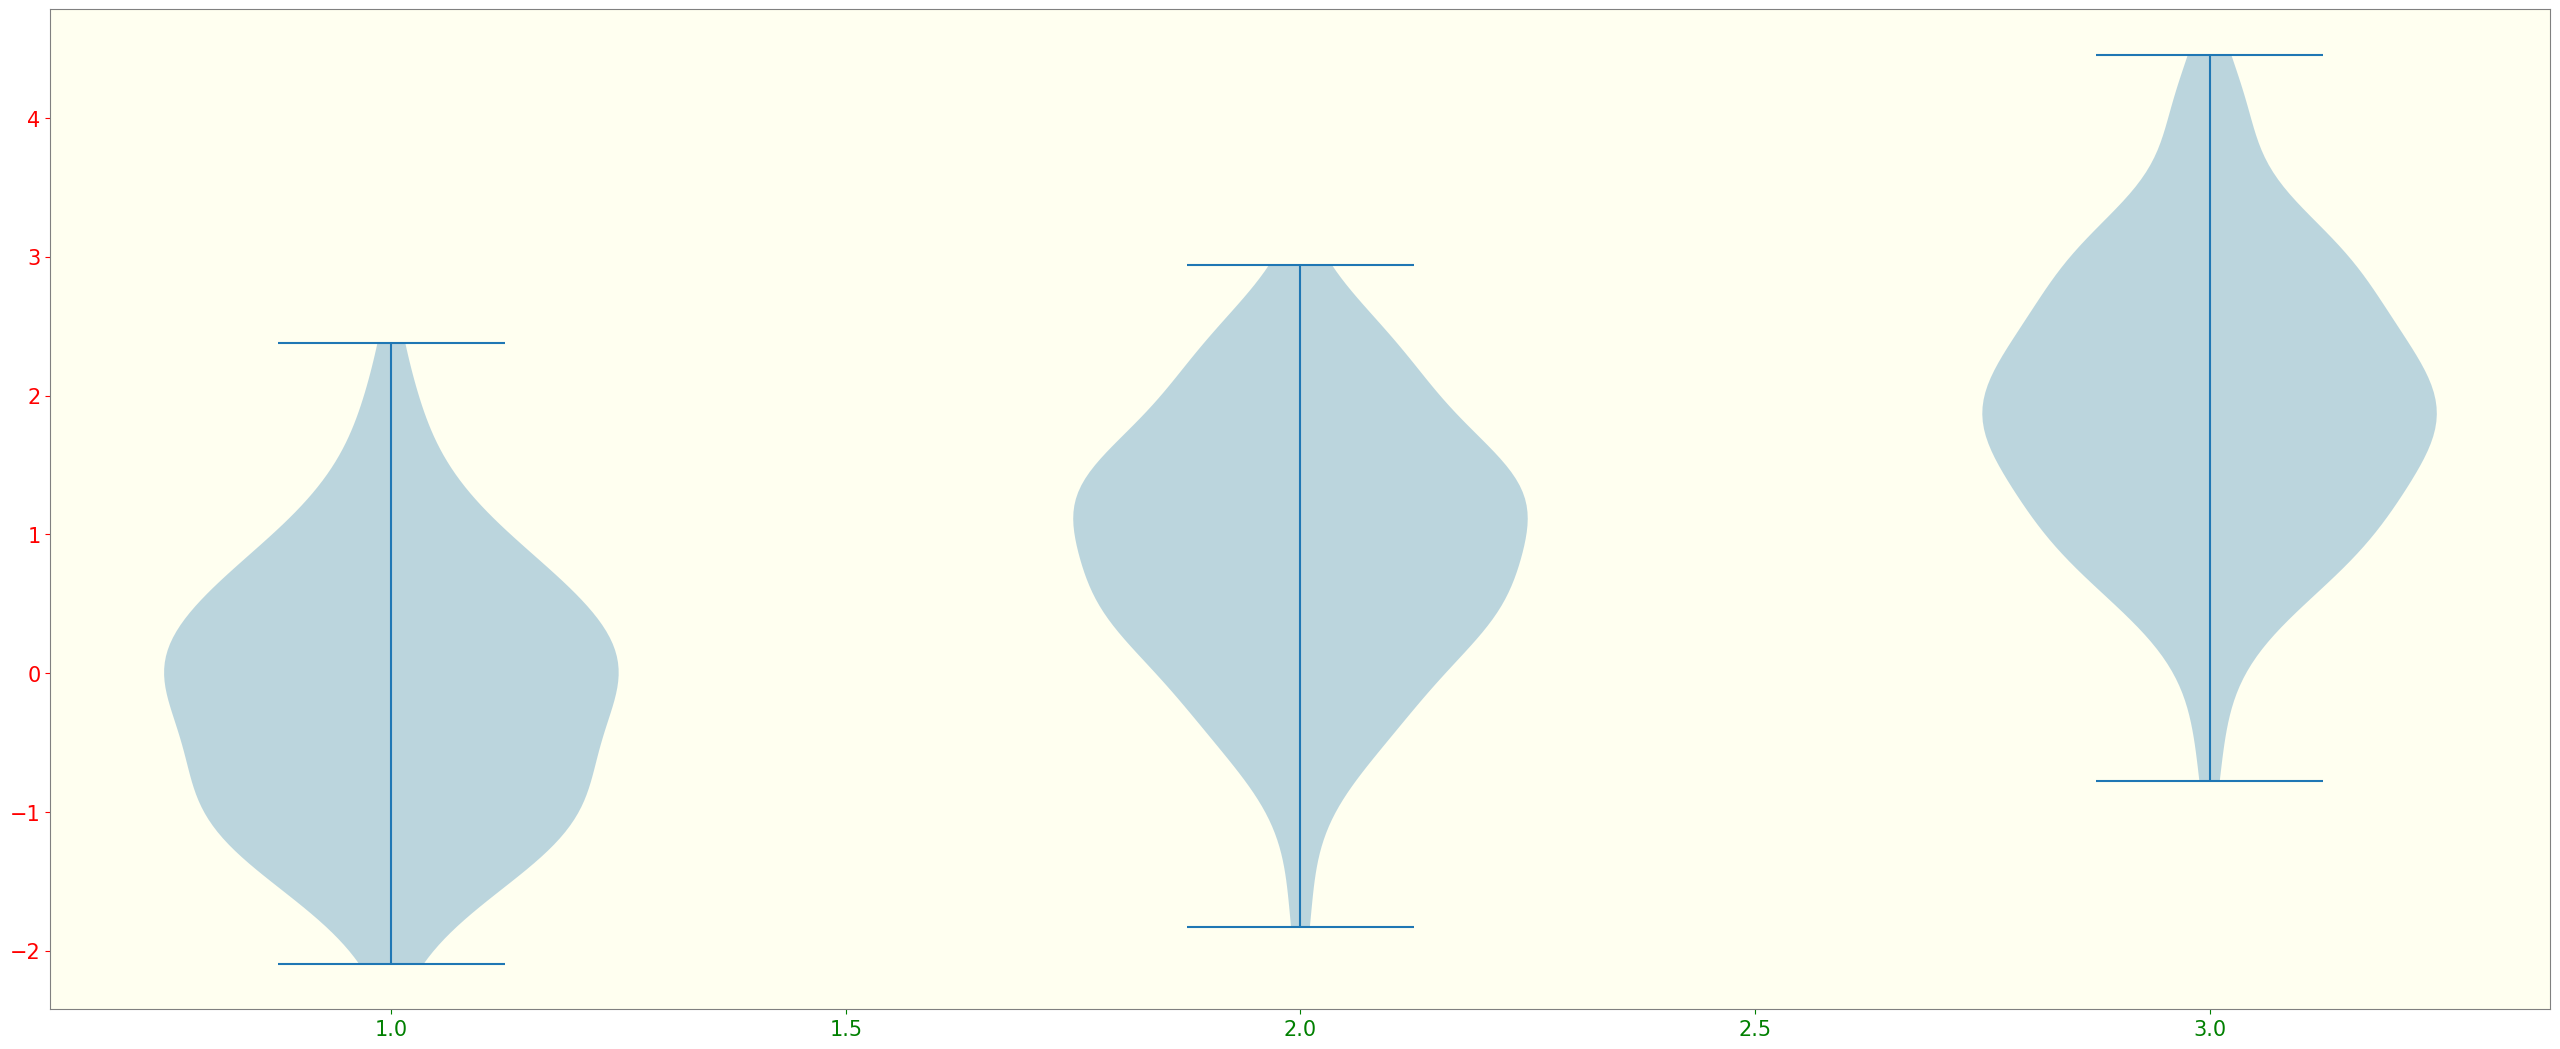

In [249]:



# Create a figure instance
fig = plt.figure()

# Create an axes instance
ax = fig.add_axes([0,0,1,1])

# Create the boxplot
bp = ax.violinplot(data_to_plot)
plt.show()






#plt.violinplot(np.array(df.FeH, dtype = float), vert=False, showmedians=True)
#plt.violinplot(np.array(df_C.FeH, dtype = float), vert=False, showmedians=True)
#plt.violinplot(np.array(df_Liu.FeH, dtype = float), vert=False, showmedians=True)


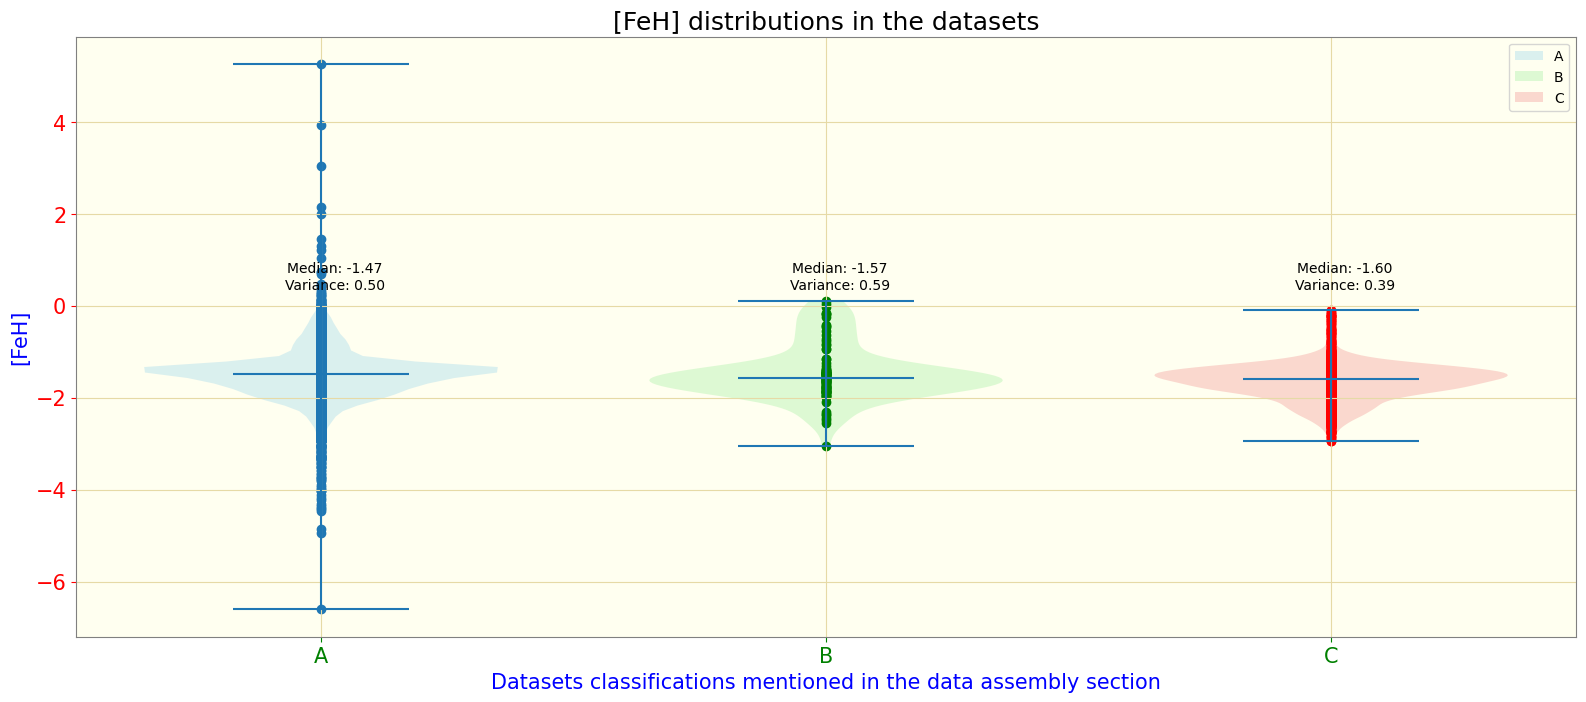

In [250]:
plt.rcParams['figure.figsize'] = [15, 6]
plt.style.use(custom_style_gold)


colors = ['skyblue', 'lightgreen', 'lightcoral']
labels = ['A', 'B', 'C']

data_to_plot = [np.array(df.FeH, dtype = float), np.array(df_C.FeH, dtype = float), np.array(df_Liu.FeH, dtype = float)]



fig = plt.figure()


ax = fig.add_axes([0, 0, 1, 1])
pos = [1.0, 2.0, 3.0]

vp = ax.violinplot(data_to_plot, showmedians=True, widths=0.7, showextrema=True)

medians = [np.median(data) for data in data_to_plot]
variances = [np.std(data) for data in data_to_plot]


ax.scatter( [1] * len(np.array(df.FeH, dtype = float)), np.array(df.FeH, dtype = float) )
ax.scatter( [2] * len(np.array(df_C.FeH, dtype = float)), np.array(df_C.FeH, dtype = float), color = 'green' )
ax.scatter( [3] * len(np.array(df_Liu.FeH, dtype = float)), np.array(df_Liu.FeH, dtype = float), color = 'red' )


for i, violin in enumerate(vp['bodies']):
    violin.set_facecolor(colors[i])
    violin.set_label(labels[i])
    ax.annotate(f"Median: {medians[i]:.2f}\nVariance: {variances[i]:.2f}", xy=(i + 1, 0), xytext=(10, 10),
                textcoords='offset points', fontsize=10, ha='center', va='bottom')
    
    
    
    
    
plt.legend(fontsize = 10)
plt.grid(True)
ax.set_xticks(pos)
ax.set_xticklabels(labels)
plt.xlabel('Datasets classifications mentioned in the data assembly section')
plt.ylabel('[FeH]')
plt.title('[FeH] distributions in the datasets')
plt.savefig('violin_Fe.png', dpi=300)

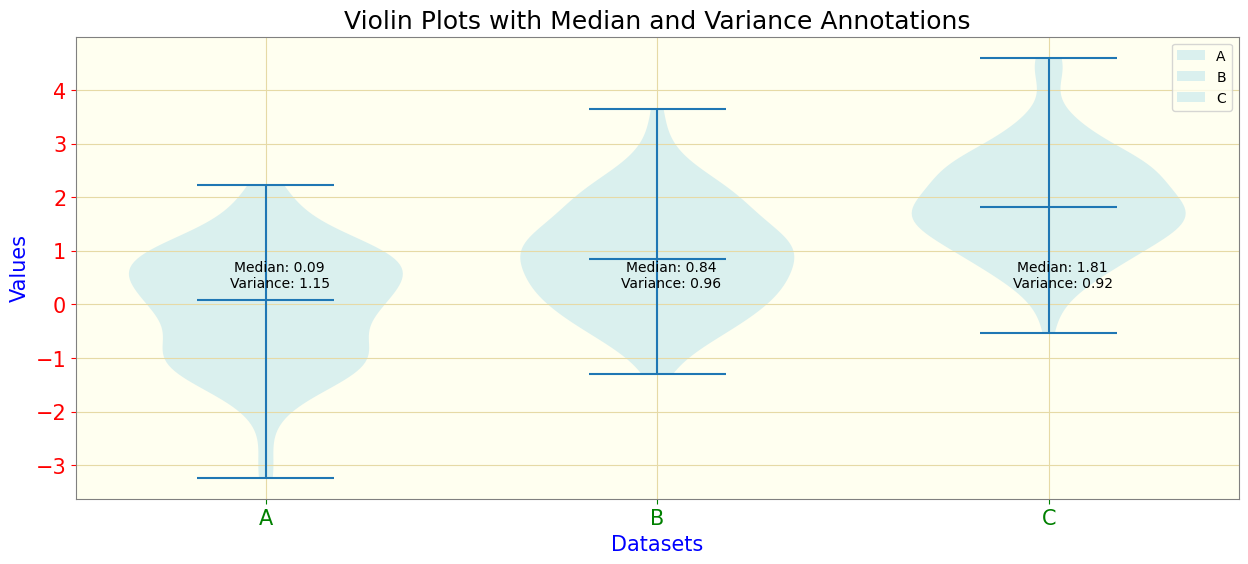

In [251]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [15, 6]

# Sample data (replace with your actual data)
data_to_plot = [np.random.normal(0, 1, 100), np.random.normal(1, 1, 100), np.random.normal(2, 1, 100)]
labels = ['A', 'B', 'C']

fig, ax = plt.subplots()

# Create violin plots and get median and variance for each dataset
vp = ax.violinplot(data_to_plot, showmedians=True, widths=0.7, showextrema=True)

medians = [np.median(data) for data in data_to_plot]
variances = [np.var(data) for data in data_to_plot]

for i, violin in enumerate(vp['bodies']):
    violin.set_facecolor('skyblue')  # Customize the violin colors
    violin.set_label(labels[i])
    # Annotate with median and variance
    ax.annotate(f"Median: {medians[i]:.2f}\nVariance: {variances[i]:.2f}", xy=(i + 1, 0), xytext=(10, 10),
                textcoords='offset points', fontsize=10, ha='center', va='bottom')

ax.grid(True)
ax.set_xticks(range(1, len(labels) + 1))
ax.set_xticklabels(labels)
ax.set_xlabel('Datasets')
ax.set_ylabel('Values')
ax.set_title('Violin Plots with Median and Variance Annotations')
ax.legend(fontsize=10)

plt.savefig('violin_with_annotations.png', dpi=300)
plt.show()


In [226]:
# XGB_ LSTM_GRU_TL LSTM
m = ['XGB', 'LSTM', 'GRU', 'TL LSTM']
Trained_on = ['dataset A', 'dataset A', 'dataset A', 'dataset A and B']
regressor = ['no', 'yes', 'yes', 'yes']
hyper = ['yes', 'yes', 'yes', 'yes']
log = ['-1.45', '-1.36', '-1.32', '-1.50']

df = pd.DataFrame({'model': m,'Trained-on': Trained_on, 'Regression-task': regressor, 'Tunning': hyper, 'logrmse-dex': log})
df.to_latex()

'\\begin{tabular}{llllll}\n\\toprule\n & model & Trained-on & Regression-task & Tunning & logrmse-dex \\\\\n\\midrule\n0 & XGB & dataset A & no & yes & -1.45 \\\\\n1 & LSTM & dataset A & yes & yes & -1.36 \\\\\n2 & GRU & dataset A & yes & yes & -1.32 \\\\\n3 & TL LSTM & dataset A and B & yes & yes & -1.50 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [241]:

with open("my_table.tex", "w") as f:
    f.write("\\begin{tabular}{" + " | ".join(["c"] * len(df.columns)) + "}\n")
    for i, row in df.iterrows():
        f.write(" & ".join([str(x) for x in row.values]) + " \\\\\n")
    f.write("\\end{tabular}")

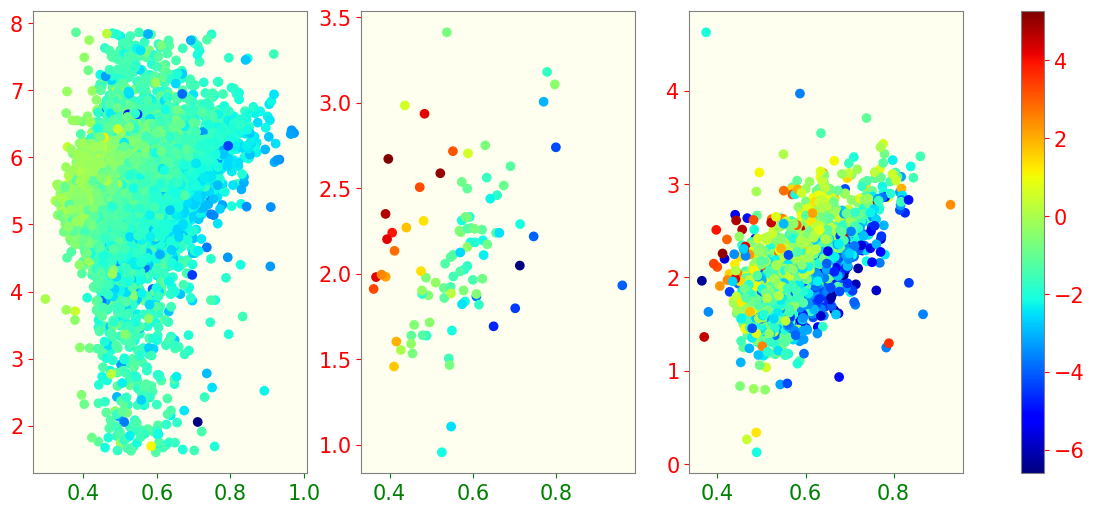

In [252]:
from matplotlib.cm import ScalarMappable
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1, 3)



sm1 = ScalarMappable(cmap='jet')
scatter1 = ax[0].scatter(np.array(df.period, dtype = float), np.array(df.phi31_g, dtype = float), c = np.array(df.FeH, dtype = float), cmap = 'jet')
sm1.set_array(np.array(df.FeH, dtype = float))

sm2 = ScalarMappable(cmap='jet')
scatter2 = ax[1].scatter(np.array(df_C.pf, dtype = float), np.array(df_C.phi31_g, dtype = float), c = np.array(df_C.FeH, dtype = float), cmap = 'jet')
sm2.set_array(np.array(df_C.FeH, dtype = float))

sm3 = ScalarMappable(cmap='jet')
scatter3 = ax[2].scatter(np.array(df_Liu.pf, dtype = float), np.array(df_Liu.phi31_g, dtype = float), c = np.array(df_Liu.FeH, dtype = float), cmap = 'jet')
sm3.set_array(np.array(df_Liu.FeH, dtype = float))


# Create a common colorbar
  # An array-like object must be assigned

# Add colorbar to the figure
cbar = fig.colorbar(sm1, ax=ax.ravel().tolist())
#cbar.set_label('Metallicity')
#plt.tight_layout()

#plt.grid(True)
#plt.xlabel('period')
#plt.ylabel('phi31')
#plt.title('Dataset A')

In [193]:
rounded_data = np.round(np.array(df.FeH, dtype = float))

# Create a colormap that maps each integer value to a color
cmap = plt.get_cmap('jet', len(np.unique(rounded_data)))


In [201]:
max(rounded_data)

5.0

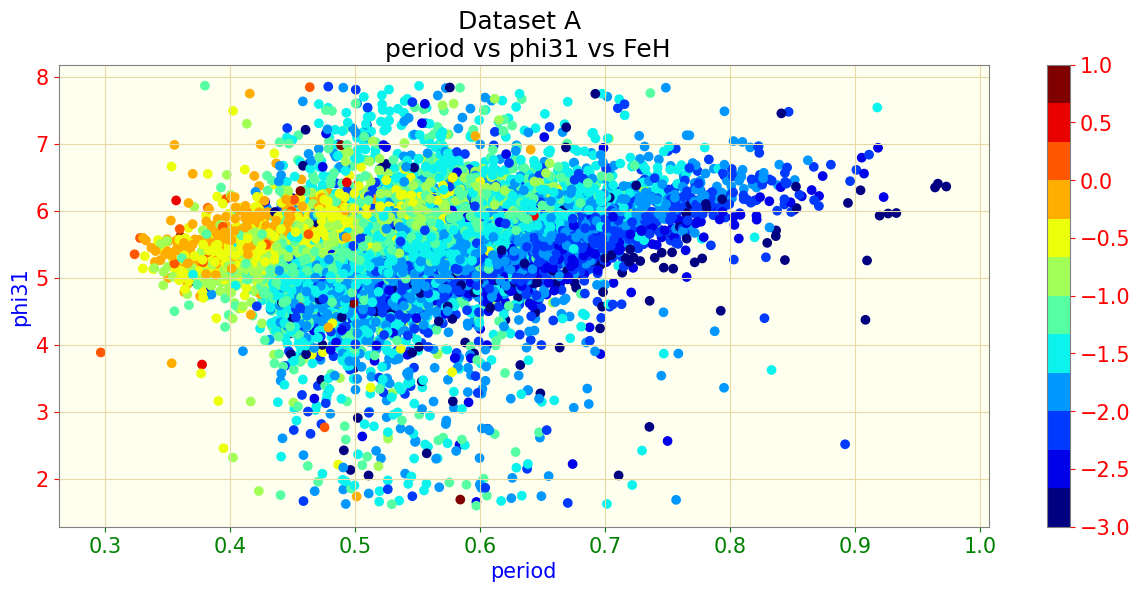

In [259]:
plt.scatter(np.array(df.period, dtype = float), np.array(df.phi31_g, dtype = float), c = np.array(df.FeH, dtype = float), cmap=cmap, vmin = -3, vmax = 1)
cbar = plt.colorbar()
plt.grid(True)

plt.xlabel('period')
plt.ylabel('phi31')
plt.title('Dataset A \n period vs phi31 vs FeH')
plt.savefig('pf_phi31_A.png', dpi=300)

1. Metallicity and error distribution for DR2 dekany, DR3 Crestani, Liu
2. Period similarities for all of them
3. period and metallicity joint for all of them
4. metallcity and phi31 join distribution.